In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob # for combining csvs

In [224]:
data_files = glob.glob('./data/*.csv')

The data is presented in seperate csv files for each year. I already started the filtering process by only grabbing data from 2000 onwards.  This is because I only want to look at more modern tennis.

In [225]:
df = pd.concat(
  (pd.read_csv(filename) for filename in data_files), 
  ignore_index=True
)

df
df_raw = df

## Preprocessing

For this section I will look to process and filter the data. Then I'll look to perform some EDA on it.

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64559 entries, 67559 to 4084
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_id     64559 non-null  object 
 1   tourney_name   64559 non-null  object 
 2   surface        64559 non-null  object 
 3   draw_size      64559 non-null  int64  
 4   tourney_level  64559 non-null  object 
 5   tourney_date   64559 non-null  int64  
 6   match_num      64559 non-null  int64  
 7   winner_id      64559 non-null  int64  
 8   winner_name    64559 non-null  object 
 9   winner_hand    64559 non-null  object 
 10  winner_ht      64559 non-null  float64
 11  winner_ioc     64559 non-null  object 
 12  winner_age     64559 non-null  float64
 13  loser_id       64559 non-null  int64  
 14  loser_name     64559 non-null  object 
 15  loser_hand     64559 non-null  object 
 16  loser_ht       64559 non-null  float64
 17  loser_ioc      64559 non-null  object 
 18  loser_ag

In [271]:
df = df.sort_values(by=['tourney_date', 'tourney_name', 'match_num'])
df.head(60)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank
67559,2000-339,Adelaide,Hard,32,A,20000103,1,102358,Thomas Enqvist,R,...,Arnaud Clement,R,173.0,FRA,22.0,6-3 6-4,3,R32,4.0,56.0
67560,2000-339,Adelaide,Hard,32,A,20000103,2,103819,Roger Federer,R,...,Jens Knippschild,R,190.0,GER,24.8,6-1 6-4,3,R32,64.0,91.0
67561,2000-339,Adelaide,Hard,32,A,20000103,3,102998,Jan Michael Gambill,R,...,Wayne Arthurs,L,190.0,AUS,28.7,3-6 7-6(5) 6-4,3,R32,58.0,105.0
67562,2000-339,Adelaide,Hard,32,A,20000103,4,103206,Sebastien Grosjean,R,...,Andrew Ilie,R,180.0,AUS,23.6,6-2 6-1,3,R32,27.0,54.0
67563,2000-339,Adelaide,Hard,32,A,20000103,5,102796,Magnus Norman,R,...,Scott Draper,L,178.0,AUS,25.5,6-4 6-4,3,R32,15.0,154.0
67564,2000-339,Adelaide,Hard,32,A,20000103,6,101735,Richard Fromberg,R,...,Todd Woodbridge,R,178.0,AUS,28.7,7-6(5) 5-7 6-4,3,R32,78.0,197.0
67565,2000-339,Adelaide,Hard,32,A,20000103,7,102872,James Sekulov,R,...,Gianluca Pozzi,L,180.0,ITA,34.5,6-4 2-6 6-2,3,R32,144.0,94.0
67566,2000-339,Adelaide,Hard,32,A,20000103,8,103252,Alberto Martin,R,...,Vincent Spadea,R,183.0,USA,25.4,6-2 6-2,3,R32,57.0,20.0
67567,2000-339,Adelaide,Hard,32,A,20000103,9,103720,Lleyton Hewitt,R,...,Mark Woodforde,L,188.0,AUS,34.2,6-3 2-6 6-1,3,R32,25.0,130.0
67569,2000-339,Adelaide,Hard,32,A,20000103,11,102652,Christian Vinck,L,...,Paul Goldstein,R,178.0,USA,23.3,3-6 6-3 6-4,3,R32,230.0,89.0


array(['Hard', 'Clay', 'Carpet', 'Grass', nan], dtype=object)

algorithm
1. sort the data so that its chronological
2. for each row - {'Arthur Fils': {'Hard': {'wins': 5, 'loses': 4}}}

Let's build the algorithm with a chunk of the data and then go from there


In [267]:
len(df['winner_name'].unique())

946

There are many columns that are dtype "object". I will have to turn those columns into numeric, or drop them. I am also seeing a lot of null values. Let's look into these columns. If I want to keep them, then I will drop the null values if there aren't that many.

In [229]:
df.shape

(73247, 49)

In [230]:
df.drop_duplicates(inplace=True)

In [231]:
df.shape # no duplicates

(73247, 49)

In [232]:
# checking for nulls
df.isna().sum(axis=0).sort_values(ascending=False)

winner_entry          64018
loser_entry           58240
loser_seed            56389
winner_seed           42803
minutes                7938
l_1stIn                6469
l_svpt                 6469
l_ace                  6469
l_df                   6469
w_1stWon               6469
w_ace                  6469
w_df                   6469
w_svpt                 6469
w_2ndWon               6469
w_1stIn                6469
l_1stWon               6469
l_2ndWon               6469
l_bpFaced              6469
l_bpSaved              6469
w_bpFaced              6469
w_bpSaved              6469
w_SvGms                6468
l_SvGms                6468
loser_ht               3621
winner_ht              1896
loser_rank             1453
loser_rank_points      1453
winner_rank             566
winner_rank_points      566
surface                  53
loser_hand               42
loser_age                12
winner_age                7
winner_hand               7
winner_ioc                0
loser_id            

In [233]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

winner_entry          0.874002
loser_entry           0.795118
loser_seed            0.769847
winner_seed           0.584365
minutes               0.108373
l_1stIn               0.088318
l_svpt                0.088318
l_ace                 0.088318
l_df                  0.088318
w_1stWon              0.088318
w_ace                 0.088318
w_df                  0.088318
w_svpt                0.088318
w_2ndWon              0.088318
w_1stIn               0.088318
l_1stWon              0.088318
l_2ndWon              0.088318
l_bpFaced             0.088318
l_bpSaved             0.088318
w_bpFaced             0.088318
w_bpSaved             0.088318
w_SvGms               0.088304
l_SvGms               0.088304
loser_ht              0.049435
winner_ht             0.025885
loser_rank            0.019837
loser_rank_points     0.019837
winner_rank           0.007727
winner_rank_points    0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_a

Winner entry and loser entry are expected to be high. Those columns are there to indicate if a player has come from the qualifications for the tournament or is a wildcard.  This is generally not the case. For now I don't think that those columns are needed, so I am going to go ahead and drop them. I am also going to drop `winner_seed` and `loser_seed` because both those columns are redundant since we have the ranking of the winner and loser too.

In [234]:
df.drop(columns=['winner_entry', 'loser_entry', 'loser_seed', 'winner_seed'], inplace=True)

In [235]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

minutes               0.108373
l_1stIn               0.088318
l_svpt                0.088318
l_1stWon              0.088318
l_df                  0.088318
l_bpFaced             0.088318
w_1stWon              0.088318
w_df                  0.088318
w_ace                 0.088318
w_2ndWon              0.088318
w_1stIn               0.088318
w_svpt                0.088318
l_2ndWon              0.088318
l_bpSaved             0.088318
l_ace                 0.088318
w_bpFaced             0.088318
w_bpSaved             0.088318
l_SvGms               0.088304
w_SvGms               0.088304
loser_ht              0.049435
winner_ht             0.025885
loser_rank_points     0.019837
loser_rank            0.019837
winner_rank_points    0.007727
winner_rank           0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_hand           0.000096
winner_age            0.000096
winner_ioc            0.000000
winner_id             0.000000
winner_n

The next group of numbers are all stats about the match that was played.  These numbers are not helpful to be worked with because they're happening after the match has already started. For now I am going to drop these numbers, but I may return to them if I want to look at previous match stats as predictors.

In [236]:
df.drop(columns=['minutes','w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced'], inplace=True)

In [237]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

loser_ht              0.049435
winner_ht             0.025885
loser_rank            0.019837
loser_rank_points     0.019837
winner_rank           0.007727
winner_rank_points    0.007727
surface               0.000724
loser_hand            0.000573
loser_age             0.000164
winner_hand           0.000096
winner_age            0.000096
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
tourney_level         0.000000
tourney_id            0.000000
tourney_name          0.000000
winner_name           0.000000
loser_name            0.000000
winner_ioc            0.000000
loser_id              0.000000
loser_ioc             0.000000
round                 0.000000
score                 0.000000
best_of               0.000000
dtype: float64

For the height columns I'm going to just filter out the null values because they're a small subset of the data.

In [238]:
df.dropna(subset=['loser_ht', 'winner_ht'], inplace=True)

In [239]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

loser_rank            0.003831
loser_rank_points     0.003831
winner_rank           0.001234
winner_rank_points    0.001234
surface               0.000044
loser_hand            0.000029
winner_hand           0.000015
tourney_name          0.000000
tourney_level         0.000000
tourney_id            0.000000
winner_name           0.000000
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
winner_ht             0.000000
winner_age            0.000000
winner_ioc            0.000000
loser_ioc             0.000000
loser_ht              0.000000
loser_name            0.000000
loser_id              0.000000
round                 0.000000
best_of               0.000000
score                 0.000000
loser_age             0.000000
dtype: float64

For the next 4 rows I want to completely drop the columns `_rank_points` columns, and just filter the nulls out of the `_rank` columns.

In [240]:
df.drop(columns=['loser_rank_points', 'winner_rank_points'], inplace=True)

In [241]:
df.dropna(subset=['loser_rank', 'winner_rank'], inplace=True)

In [242]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

surface          0.000044
tourney_id       0.000000
tourney_name     0.000000
draw_size        0.000000
tourney_level    0.000000
tourney_date     0.000000
match_num        0.000000
winner_id        0.000000
winner_name      0.000000
winner_hand      0.000000
winner_ht        0.000000
winner_ioc       0.000000
winner_age       0.000000
loser_id         0.000000
loser_name       0.000000
loser_hand       0.000000
loser_ht         0.000000
loser_ioc        0.000000
loser_age        0.000000
score            0.000000
best_of          0.000000
round            0.000000
winner_rank      0.000000
loser_rank       0.000000
dtype: float64

There are several others columns here like `surface` that I want to delve a little more deeply into. If someone is a clay court specialist or is a grass court specialist.  However for now I'm going to leave that column out of my analysis. I will also take out a couple other columns that are not worth including for now. 

Many of the null values have been removed, and now I want to explore doing some feature engineering.  I want to engineer a feature that gives me the surface win percentage for both the winner and loser of each match. For my overall analysis I am going to only look at Masters 1000 tournaments and Grand Slams, but for this I would like to include all lower level, but still ATP tour matches.  This is pretty easy to do.

In [249]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank
67559,2000-339,Adelaide,Hard,32,A,20000103,1,102358,Thomas Enqvist,R,...,Arnaud Clement,R,173.0,FRA,22.0,6-3 6-4,3,R32,4.0,56.0
67560,2000-339,Adelaide,Hard,32,A,20000103,2,103819,Roger Federer,R,...,Jens Knippschild,R,190.0,GER,24.8,6-1 6-4,3,R32,64.0,91.0
67561,2000-339,Adelaide,Hard,32,A,20000103,3,102998,Jan Michael Gambill,R,...,Wayne Arthurs,L,190.0,AUS,28.7,3-6 7-6(5) 6-4,3,R32,58.0,105.0
67562,2000-339,Adelaide,Hard,32,A,20000103,4,103206,Sebastien Grosjean,R,...,Andrew Ilie,R,180.0,AUS,23.6,6-2 6-1,3,R32,27.0,54.0
67563,2000-339,Adelaide,Hard,32,A,20000103,5,102796,Magnus Norman,R,...,Scott Draper,L,178.0,AUS,25.5,6-4 6-4,3,R32,15.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,2024-7694,Lyon,Clay,32,A,20240520,278,126207,Frances Tiafoe,R,...,Jaume Munar,R,183.0,ESP,27.0,7-6(5) 6-4,3,R32,26.0,63.0
4104,2024-7694,Lyon,Clay,32,A,20240520,275,200384,Hugo Gaston,L,...,Daniel Elahi Galan,R,191.0,COL,27.9,7-6(2) 7-6(4),3,R32,104.0,105.0
4105,2024-7694,Lyon,Clay,32,A,20240520,273,200303,Pavel Kotov,R,...,Pedro Cachin,R,185.0,ARG,29.1,6-1 6-4,3,R32,57.0,106.0
4106,2024-7694,Lyon,Clay,32,A,20240520,272,124186,Alexandre Muller,R,...,Richard Gasquet,R,185.0,FRA,37.9,6-4 6-4,3,R32,90.0,124.0


In [250]:
tourney_fltr = ((df['tourney_level'] == 'M') | (df['tourney_level'] == 'G') | (df['tourney_level'] == 'A'))

df = df.loc[tourney_fltr, :]

In [251]:
df['tourney_level'].unique()

array(['A', 'G', 'M'], dtype=object)

In [252]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

tourney_id       0.0
tourney_name     0.0
surface          0.0
draw_size        0.0
tourney_level    0.0
tourney_date     0.0
match_num        0.0
winner_id        0.0
winner_name      0.0
winner_hand      0.0
winner_ht        0.0
winner_ioc       0.0
winner_age       0.0
loser_id         0.0
loser_name       0.0
loser_hand       0.0
loser_ht         0.0
loser_ioc        0.0
loser_age        0.0
score            0.0
best_of          0.0
round            0.0
winner_rank      0.0
loser_rank       0.0
dtype: float64

Ok so getting rid of those lower level tournaments got rid of the null values in surface. What surfaces to I have now?

In [253]:
df['surface'].value_counts()

surface
Hard      35154
Clay      20949
Grass      7050
Carpet     1406
Name: count, dtype: int64

Ok I've got 4 surfaces. Firstly, I need the data from fucking 1990 onwards cause I've gotta include players who have been playing since 2000 and before.

In [96]:
df.drop(columns=['round', 'surface', 'tourney_id', 'tourney_name', 'draw_size', 'tourney_date', 'match_num'], inplace=True)

In [97]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

tourney_level    0.0
winner_id        0.0
winner_name      0.0
winner_hand      0.0
winner_ht        0.0
winner_ioc       0.0
winner_age       0.0
loser_id         0.0
loser_name       0.0
loser_hand       0.0
loser_ht         0.0
loser_ioc        0.0
loser_age        0.0
score            0.0
best_of          0.0
winner_rank      0.0
loser_rank       0.0
dtype: float64

Now that I don't have any nulls in my dataset, and I've removed many of the columns that aren't needed, I'm going to filter down the data. The biggest change that I want to make is to only include high level professional tennis tournaments.  These tournaments are called Grand Slams, and Masters 1000s. Thankfully, these tournaments are easy to filter for in the dataset. If needed I can add other tournaments in at another time.

In [98]:
df['tourney_level'].value_counts()

tourney_level
A    38974
M    13564
G    12021
D     3605
F      397
Name: count, dtype: int64

In [99]:
tourney_fltr = ((df['tourney_level'] == 'M') | (df['tourney_level'] == 'G'))

df_filtered = df.loc[tourney_fltr, :]

In [100]:
df_filtered['tourney_level'].value_counts()

tourney_level
M    13564
G    12021
Name: count, dtype: int64

In [101]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69541 to 4053
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_level  25585 non-null  object 
 1   winner_id      25585 non-null  int64  
 2   winner_name    25585 non-null  object 
 3   winner_hand    25585 non-null  object 
 4   winner_ht      25585 non-null  float64
 5   winner_ioc     25585 non-null  object 
 6   winner_age     25585 non-null  float64
 7   loser_id       25585 non-null  int64  
 8   loser_name     25585 non-null  object 
 9   loser_hand     25585 non-null  object 
 10  loser_ht       25585 non-null  float64
 11  loser_ioc      25585 non-null  object 
 12  loser_age      25585 non-null  float64
 13  score          25585 non-null  object 
 14  best_of        25585 non-null  int64  
 15  winner_rank    25585 non-null  float64
 16  loser_rank     25585 non-null  float64
dtypes: float64(6), int64(3), object(8)
memory usage: 3.5

Now that I've used the `tourney_level` column to filter the dataset I can go ahead and drop it. More than that I can actually go ahead and drop all non-numeric columns.

In [102]:
df_filtered = df_filtered.select_dtypes('number')

In [103]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69541 to 4053
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner_id    25585 non-null  int64  
 1   winner_ht    25585 non-null  float64
 2   winner_age   25585 non-null  float64
 3   loser_id     25585 non-null  int64  
 4   loser_ht     25585 non-null  float64
 5   loser_age    25585 non-null  float64
 6   best_of      25585 non-null  int64  
 7   winner_rank  25585 non-null  float64
 8   loser_rank   25585 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 2.0 MB


Lastly I want to drop the `_id` columns because they are identifiers.

In [104]:
df_filtered.drop(columns=['winner_id', 'loser_id'], inplace=True)

In [105]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69541 to 4053
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner_ht    25585 non-null  float64
 1   winner_age   25585 non-null  float64
 2   loser_ht     25585 non-null  float64
 3   loser_age    25585 non-null  float64
 4   best_of      25585 non-null  int64  
 5   winner_rank  25585 non-null  float64
 6   loser_rank   25585 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


In [106]:
df_filtered

,winner_ht,winner_age,loser_ht,loser_age,best_of,winner_rank,loser_rank
69541,180.0,29.7,180.0,21.3,5,1.0,112.0
69542,193.0,23.3,173.0,23.2,5,47.0,77.0
69543,183.0,21.8,180.0,25.3,5,33.0,27.0
69544,178.0,28.7,183.0,29.7,5,204.0,93.0
69545,180.0,23.7,180.0,31.1,5,46.0,65.0
...,...,...,...,...,...,...,...
4049,185.0,20.7,191.0,25.6,3,81.0,78.0
4050,185.0,30.6,178.0,29.0,3,86.0,76.0
4051,180.0,30.0,193.0,29.0,3,52.0,168.0
4052,185.0,20.8,196.0,24.7,3,121.0,42.0


This is my final dataset for now. I know that there are not a lot of features, but I will look to create one more called `ranking_difference` after manipulating the data to have a target column.

In [107]:
suffix_to_append = ['_rank', '_ht', '_age']
final_df = pd.DataFrame(columns=list("HR" + ele for ele in suffix_to_append) + 
                            list("LR" + ele for ele in suffix_to_append)  + ['best_of'] + ["HR_win"],
                      index=df_filtered.index)

In [108]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win
69541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
for index,row in df_filtered.iterrows():
    if row["winner_rank"] < row["loser_rank"]:

        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 1
        final_df.loc[index,"best_of"] = row['best_of']
    else:

        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 0
        final_df.loc[index,"best_of"] = row['best_of']

In [110]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win
69541,1.0,180.0,29.7,112.0,180.0,21.3,5.0,1
69542,47.0,193.0,23.3,77.0,173.0,23.2,5.0,1
69543,27.0,180.0,25.3,33.0,183.0,21.8,5.0,0
69544,93.0,183.0,29.7,204.0,178.0,28.7,5.0,0
69545,46.0,180.0,23.7,65.0,180.0,31.1,5.0,1
...,...,...,...,...,...,...,...,...
4049,78.0,191.0,25.6,81.0,185.0,20.7,3.0,0
4050,76.0,178.0,29.0,86.0,185.0,30.6,3.0,0
4051,52.0,180.0,30.0,168.0,193.0,29.0,3.0,1
4052,42.0,196.0,24.7,121.0,185.0,20.8,3.0,0


In [111]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69541 to 4053
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HR_rank  25585 non-null  object
 1   HR_ht    25585 non-null  object
 2   HR_age   25585 non-null  object
 3   LR_rank  25585 non-null  object
 4   LR_ht    25585 non-null  object
 5   LR_age   25585 non-null  object
 6   best_of  25585 non-null  object
 7   HR_win   25585 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [112]:
df_obj_cols = final_df.select_dtypes(include='object').columns

final_df[df_obj_cols] = final_df[df_obj_cols].apply(pd.to_numeric, errors='coerce')

In [113]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25585 entries, 69541 to 4053
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HR_rank  25585 non-null  float64
 1   HR_ht    25585 non-null  float64
 2   HR_age   25585 non-null  float64
 3   LR_rank  25585 non-null  float64
 4   LR_ht    25585 non-null  float64
 5   LR_age   25585 non-null  float64
 6   best_of  25585 non-null  float64
 7   HR_win   25585 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 2.8 MB


During the process of changing the organization of the dataset, numeric values were changed to "object" dtype.  So the above code is just changing them back.

In [114]:
final_df['ranking_difference'] = final_df['LR_rank'] - final_df['HR_rank']

That is the end of the preprocessing for now. All in all the data looks in good shape for a logistic regression. I will perform one, but first I need to do a little EDA.

### EDA

First I want to look at the class imbalance for my target variable `HR_win`. This will also show how good a random guess for the higher ranked player will be. This number will be the number that I am looking to improve upon in my logistic regression.

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
final_df['HR_win'].sum() / final_df.shape[0]

0.6758647645104553

Ok so a simple model of just picking the higher ranked player would work about 68% of the time.  The other EDA I want to do on this dataset is to look at the distribution of my features.

In [117]:
final_df['HR_age'].mean()

26.625323431698263

In [118]:
final_df['LR_age'].mean()

26.536036740277506

Let's look at the distribution of age

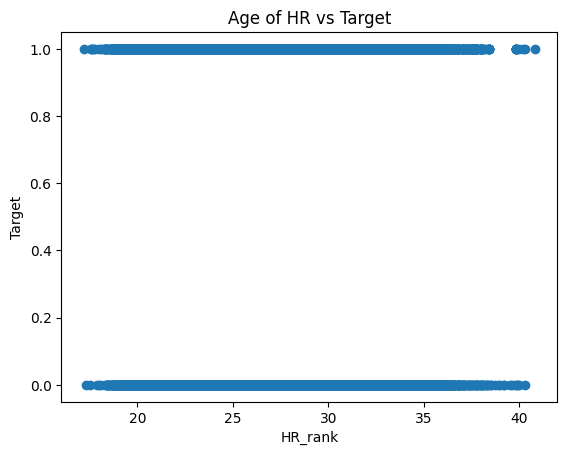

In [119]:
plt.scatter(final_df['HR_age'], final_df['HR_win'])
plt.xlabel('HR_rank')
plt.ylabel('Target')
plt.title('Age of HR vs Target')
plt.show()

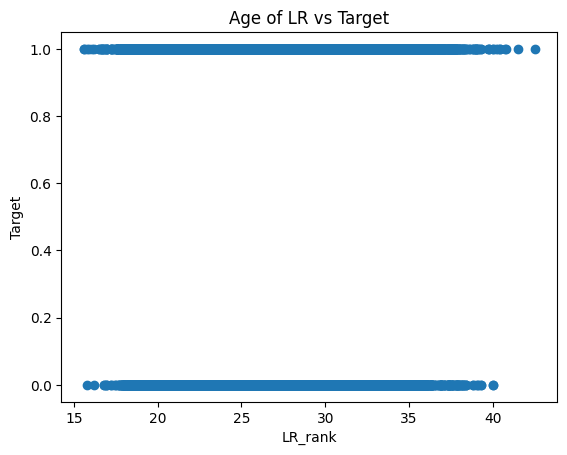

In [120]:
plt.scatter(final_df['LR_age'], final_df['HR_win'])
plt.xlabel('LR_rank')
plt.ylabel('Target')
plt.title('Age of LR vs Target')
plt.show()

There does not seem to be a clear point for drawing a sigmoid curve on the `_age` data. I'm going to look at a couple of the other features and see if they might be good predictors.  

In [121]:
final_df.sample(10)

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win,ranking_difference
3055,1.0,188.0,36.6,19.0,183.0,35.5,5.0,1,18.0
19849,69.0,188.0,21.6,71.0,180.0,26.0,5.0,1,2.0
22349,9.0,196.0,25.2,64.0,181.0,31.9,5.0,1,55.0
6383,1.0,185.0,32.1,38.0,198.0,22.2,3.0,1,37.0
13755,14.0,188.0,22.8,60.0,188.0,33.5,5.0,1,46.0
62146,19.0,180.0,33.0,46.0,188.0,18.5,5.0,0,27.0
12126,9.0,193.0,22.0,20.0,183.0,23.4,3.0,1,11.0
33206,28.0,185.0,26.8,131.0,185.0,29.7,5.0,1,103.0
40973,20.0,185.0,29.2,210.0,180.0,29.8,5.0,1,190.0
4415,42.0,196.0,28.6,71.0,188.0,34.6,5.0,0,29.0


Let's look at ranking difference. That column should show us some difference.

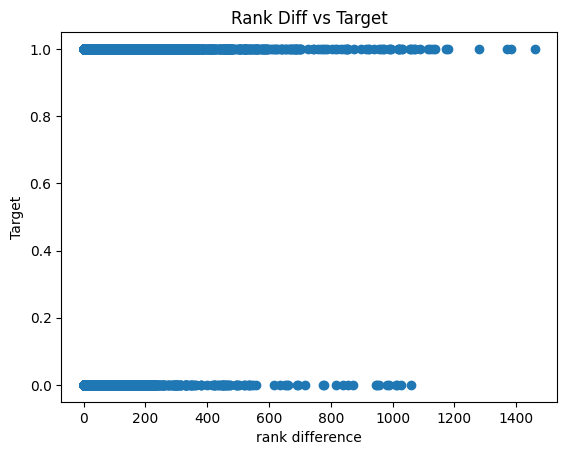

In [122]:
plt.scatter(final_df['ranking_difference'], final_df['HR_win'])
plt.xlabel('rank difference')
plt.ylabel('Target')
plt.title('Rank Diff vs Target')
plt.show()

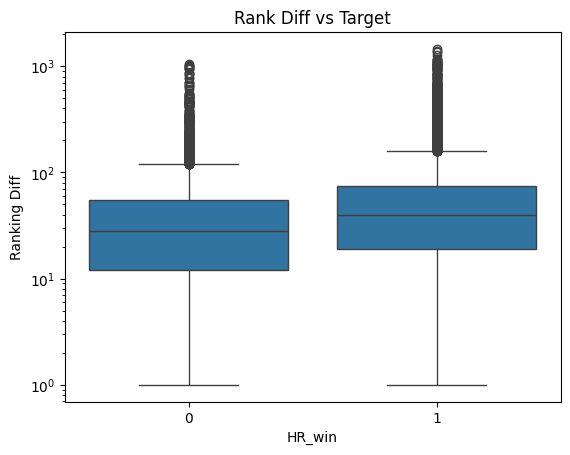

In [221]:
sns.boxplot(x='HR_win', y='ranking_difference', data=final_df)
plt.xlabel('HR_win')
plt.ylabel('Ranking Diff')
plt.title('Rank Diff vs Target')
plt.yscale('log')
plt.show()

In [132]:
rank_filtr = final_df['ranking_difference'] > 600
LR_filtr = final_df['HR_win'] == 0
HR_filtr = final_df['HR_win'] == 1


# final_df.loc[(rank_filtr & LR_filtr), :]
final_df[rank_filtr & LR_filtr].shape

(23, 9)

Here we can start to see a difference. As the ranking disparity gets higher, the likelihood of the lower ranked player winning becomes smaller and smaller. Let's also look at the means.

In [133]:
final_df[LR_filtr]['ranking_difference'].mean()

46.09875798866514

In [134]:
final_df[HR_filtr]['ranking_difference'].mean()

63.09553550774925

Here we can start to see a feature that can have an impact on predicting a tennis match.

### Modeling

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [136]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,ranking_difference
69541,1.0,180.0,29.7,112.0,180.0,21.3,5.0,111.0
69542,47.0,193.0,23.3,77.0,173.0,23.2,5.0,30.0
69543,27.0,180.0,25.3,33.0,183.0,21.8,5.0,6.0
69544,93.0,183.0,29.7,204.0,178.0,28.7,5.0,111.0
69545,46.0,180.0,23.7,65.0,180.0,31.1,5.0,19.0
...,...,...,...,...,...,...,...,...
4049,78.0,191.0,25.6,81.0,185.0,20.7,3.0,3.0
4050,76.0,178.0,29.0,86.0,185.0,30.6,3.0,10.0
4051,52.0,180.0,30.0,168.0,193.0,29.0,3.0,116.0
4052,42.0,196.0,24.7,121.0,185.0,20.8,3.0,79.0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43, stratify=y)

In [138]:
# Fitting logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.6762038774233896
Test score: 0.6765671408472722


In [139]:
coefficients = logreg.coef_[0]
coefficients

array([-0.01034454,  0.00590796, -0.01298469, -0.00335099, -0.00648036,
        0.02472892,  0.18672096,  0.00699354])

In [140]:
feature_names = X_train.columns

coefficients = logreg.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.010344536863874161
feature: HR_ht, coefficent: 0.005907962239101886
feature: HR_age, coefficent: -0.012984686129556847
feature: LR_rank, coefficent: -0.003350993214462895
feature: LR_ht, coefficent: -0.006480356350592228
feature: LR_age, coefficent: 0.024728923308552985
feature: best_of, coefficent: 0.1867209553503641
feature: ranking_difference, coefficent: 0.006993543649412229


This score is roughly the same as random guessing. Let's go ahead and scale the data and then run the logistic regression with the scaled data.

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression(C=1)
logreg_scaled.fit(X_train_scaled, y_train)

coefficients = logreg_scaled.coef_[0]

In [143]:
print(f"Train score: {logreg_scaled.score(X_train_scaled, y_train)}")
print(f"Test score: {logreg_scaled.score(X_test_scaled, y_test)}")

Train score: 0.6753179070252241
Test score: 0.6765671408472722


In [144]:
feature_names = X_train.columns

coefficients = logreg_scaled.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.40963072448265603
feature: HR_ht, coefficent: 0.011770098344695602
feature: HR_age, coefficent: -0.05591489464021224
feature: LR_rank, coefficent: 0.07226457299330998
feature: LR_ht, coefficent: -0.07289477665103128
feature: LR_age, coefficent: 0.09337608618149985
feature: best_of, coefficent: 0.18152113068489387
feature: ranking_difference, coefficent: 0.22217540177333978


In [ ]:
# make all the feature differences, and throw out the HR and LR, and then try random forest - nonlinear model
# add a couple more features (ie win pct on surface)

In [ ]:
# obj = {player_name: [.87, .78, .85] 

Modeling was not great, and definitely hoped for better, but it is a good start, and now I will just look to add better features.

Given that the outcome is the same if I were to just guess the higher ranked won each time, I need to employ some different strategies. For this I am going to make all the features differences of the higher ranked minus the lower ranked, and then try the non-linear random forest algorithm. 

In [145]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win,ranking_difference
69541,1.0,180.0,29.7,112.0,180.0,21.3,5.0,1,111.0
69542,47.0,193.0,23.3,77.0,173.0,23.2,5.0,1,30.0
69543,27.0,180.0,25.3,33.0,183.0,21.8,5.0,0,6.0
69544,93.0,183.0,29.7,204.0,178.0,28.7,5.0,0,111.0
69545,46.0,180.0,23.7,65.0,180.0,31.1,5.0,1,19.0
...,...,...,...,...,...,...,...,...,...
4049,78.0,191.0,25.6,81.0,185.0,20.7,3.0,0,3.0
4050,76.0,178.0,29.0,86.0,185.0,30.6,3.0,0,10.0
4051,52.0,180.0,30.0,168.0,193.0,29.0,3.0,1,116.0
4052,42.0,196.0,24.7,121.0,185.0,20.8,3.0,0,79.0


In [148]:
final_df['height_diff'] = final_df['HR_ht'] - final_df['LR_ht']
final_df['age_diff'] = final_df['HR_age'] - final_df['LR_age']

In [151]:
final_df.drop(columns=['HR_ht', 'LR_ht', 'HR_age', 'LR_age', 'HR_rank', 'LR_rank'], inplace=True)

In [152]:
final_df

,best_of,HR_win,ranking_difference,height_diff,age_diff
69541,5.0,1,111.0,0.0,8.4
69542,5.0,1,30.0,20.0,0.1
69543,5.0,0,6.0,-3.0,3.5
69544,5.0,0,111.0,5.0,1.0
69545,5.0,1,19.0,0.0,-7.4
...,...,...,...,...,...
4049,3.0,0,3.0,6.0,4.9
4050,3.0,0,10.0,-7.0,-1.6
4051,3.0,1,116.0,-13.0,1.0
4052,3.0,0,79.0,11.0,3.9


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [182]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

,best_of,ranking_difference,height_diff,age_diff
69541,5.0,111.0,0.0,8.4
69542,5.0,30.0,20.0,0.1
69543,5.0,6.0,-3.0,3.5
69544,5.0,111.0,5.0,1.0
69545,5.0,19.0,0.0,-7.4
...,...,...,...,...
4049,3.0,3.0,6.0,4.9
4050,3.0,10.0,-7.0,-1.6
4051,3.0,116.0,-13.0,1.0
4052,3.0,79.0,11.0,3.9


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [193]:
# Without scaling
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [194]:
rf.score(X_train,y_train) # for unlimited depth trees, training acc always 1.0

0.6782363977485929

In [195]:
rf.score(X_test,y_test)

0.6776614037830233

In [218]:
# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_scaled = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [219]:
rf_scaled.score(X_train_scaled,y_train) # for unlimited depth trees, training acc always 1.0

0.6782363977485929

In [220]:
rf_scaled.score(X_test_scaled,y_test)

0.6776614037830233

Even with the non-linear random forest classifier, I am still not able to add any significant increase in accuracy to my model. This means that I will likely need to add additional features to my data if I want to see any change. I will set about doing that.

Let's work on creating my target variable first

### Presentation Code Snippets

#### Preprocessing Slide

In [42]:
some_data = np.random.randint(low=0,high=100,size=(1000,11))

In [43]:
mock_df_raw = pd.DataFrame(some_data,
                  index=list("match_{}".format(i) for i in range(some_data.shape[0])),
                  columns= list("WIN_feat{}".format(i) for i in range(5)) + 
                           list("LOS_feat{}".format(i) for i in range(5))  + ["NULL"])

mock_df_raw

,WIN_feat0,WIN_feat1,WIN_feat2,WIN_feat3,WIN_feat4,LOS_feat0,LOS_feat1,LOS_feat2,LOS_feat3,LOS_feat4,NULL
match_0,52,6,0,96,14,36,19,27,0,68,1
match_1,25,52,49,62,39,19,43,15,17,99,54
match_2,66,6,44,78,13,15,77,71,7,80,13
match_3,2,96,50,32,46,33,34,51,69,16,58
match_4,40,63,49,9,66,10,66,69,80,46,49
...,...,...,...,...,...,...,...,...,...,...,...
match_995,39,34,99,72,82,31,40,18,59,1,19
match_996,40,66,77,32,87,32,7,33,50,86,10
match_997,14,38,78,67,46,99,50,38,50,14,15
match_998,15,17,78,50,35,46,87,79,19,88,78


In [44]:
formatted_mock_df = pd.DataFrame(some_data, 
                      columns=list("HR_feat{}".format(i) for i in range(5)) + 
                      list("LR_feat{}".format(i) for i in range(5)) + ["HR_win"],
                      index=mock_df.index)
formatted_mock_df['HR_win'] = np.where(formatted_mock_df['HR_win'] > 50, 1, 0)

formatted_mock_df

,HR_feat0,HR_feat1,HR_feat2,HR_feat3,HR_feat4,LR_feat0,LR_feat1,LR_feat2,LR_feat3,LR_feat4,HR_win
match_0,52,6,0,96,14,36,19,27,0,68,0
match_1,25,52,49,62,39,19,43,15,17,99,1
match_2,66,6,44,78,13,15,77,71,7,80,0
match_3,2,96,50,32,46,33,34,51,69,16,1
match_4,40,63,49,9,66,10,66,69,80,46,0
...,...,...,...,...,...,...,...,...,...,...,...
match_995,39,34,99,72,82,31,40,18,59,1,0
match_996,40,66,77,32,87,32,7,33,50,86,0
match_997,14,38,78,67,46,99,50,38,50,14,0
match_998,15,17,78,50,35,46,87,79,19,88,1


In [73]:
pd.set_option('display.max_columns', 100)
df_raw

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,6-4 3-6 6-2,3,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,7-6(6) 6-2,3,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,104871,NaN,NaN,Jeremy Chardy,R,188.0,FRA,31.8,6-2 6-2,3,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,200282,7.0,NaN,Alex De Minaur,R,183.0,AUS,19.8,6-4 7-6(2),3,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,105683,5.0,NaN,Milos Raonic,R,196.0,CAN,28.0,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73242,2014-605,Tour Finals,Hard,8,F,20141109,514,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,27.4,105453,4.0,NaN,Kei Nishikori,R,178.0,JPN,24.8,6-1 3-6 6-0,3,SF,88.0,3.0,2.0,58.0,34.0,28.0,13.0,11.0,2.0,4.0,3.0,6.0,67.0,38.0,29.0,5.0,11.0,3.0,9.0,1.0,10010.0,5.0,4625.0
73243,2014-605,Tour Finals,Hard,8,F,20141109,515,104925,1.0,NaN,Novak Djokovic,R,188.0,SRB,27.4,103819,2.0,NaN,Roger Federer,R,185.0,SUI,33.2,W/O,3,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10010.0,2.0,8700.0
73244,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,1,104527,NaN,NaN,Stan Wawrinka,R,183.0,SUI,29.6,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,29.5,6-1 3-6 6-3 6-2,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5295.0,12.0,2740.0
73245,2014-D015,Davis Cup WG F: FRA vs SUI,Clay,4,D,20141121,2,104792,NaN,NaN,Gael Monfils,R,193.0,FRA,28.2,103819,NaN,NaN,Roger Federer,R,185.0,SUI,33.2,6-1 6-4 6-3,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1825.0,2.0,9700.0


In [158]:
final_df

,HR_rank,HR_ht,HR_age,LR_rank,LR_ht,LR_age,best_of,HR_win,ranking_difference
69611,41.0,175.0,26.2,123.0,193.0,22.8,5.0,1,82.0
69629,7.0,188.0,23.4,54.0,173.0,22.0,5.0,0,47.0
69594,52.0,175.0,21.4,89.0,180.0,27.1,5.0,0,37.0
69595,29.0,193.0,28.3,257.0,193.0,21.8,5.0,1,228.0
69596,12.0,188.0,21.7,171.0,190.0,24.4,5.0,1,159.0
...,...,...,...,...,...,...,...,...,...
3965,9.0,196.0,27.2,16.0,185.0,26.9,3.0,0,7.0
3966,18.0,198.0,27.9,32.0,188.0,26.9,3.0,0,14.0
4015,28.0,196.0,24.8,61.0,185.0,24.1,3.0,1,33.0
4017,12.0,185.0,21.0,81.0,185.0,20.7,3.0,1,69.0


#### EDA Slide

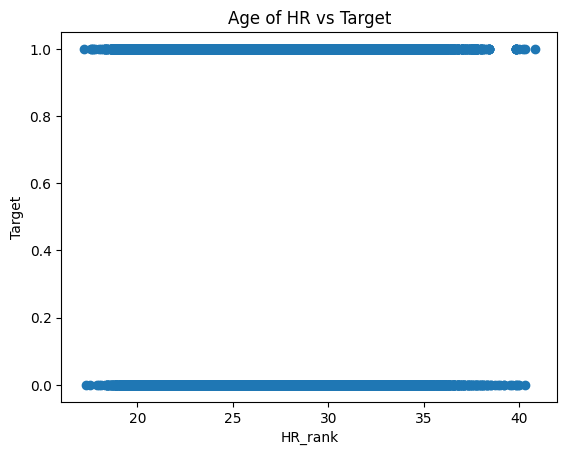

In [230]:
plt.scatter(final_df['HR_age'], final_df['HR_win'])
plt.xlabel('HR_rank')
plt.ylabel('Target')
plt.title('Age of HR vs Target')
plt.show()

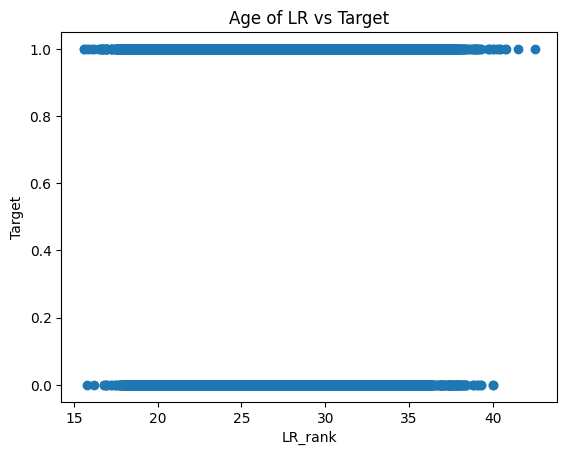

In [233]:
plt.scatter(final_df['LR_age'], final_df['HR_win'])
plt.xlabel('LR_rank')
plt.ylabel('Target')
plt.title('Age of LR vs Target')
plt.show()

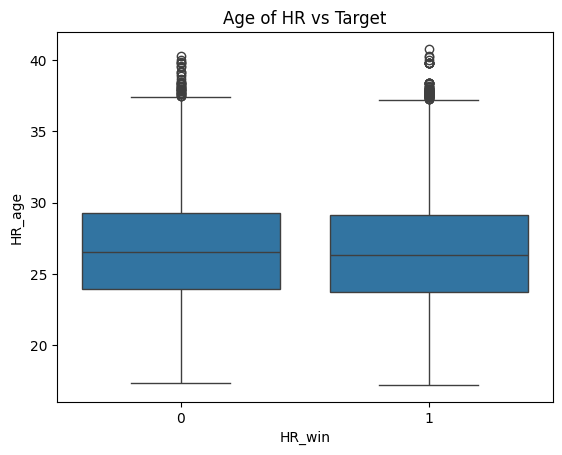

In [232]:
sns.boxplot(x='HR_win', y='HR_age', data=final_df)
plt.xlabel('HR_win')
plt.ylabel('HR_age')
plt.title('Age of HR vs Target')
plt.show()

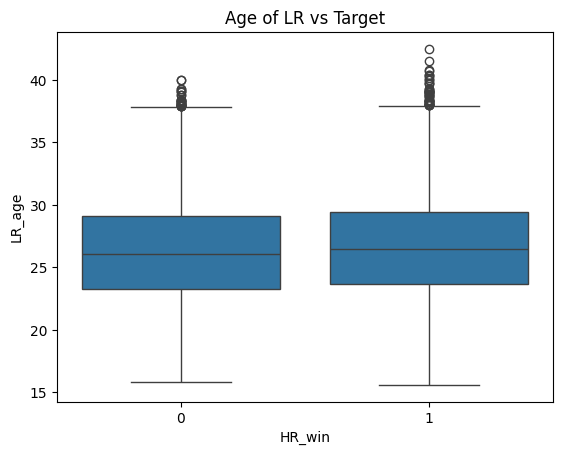

In [228]:
sns.boxplot(x='HR_win', y='LR_age', data=final_df)
plt.xlabel('HR_win')
plt.ylabel('LR_age')
plt.title('Age of LR vs Target')
plt.show()